# Basic Implementation of Logistic Regression Classifier to Predict Student Admissions from Exam Results 

The objective of this basic programme is to employ a logistic regression classifier to determine whether or not a student will get admitted to a university based on their scores in two exams. The model will be trained on past exam scores and admission data. 

We begin by importing the data, printing some basic statistics and plotting the data.

       Exam 1 mark  Exam 2 mark   Pass/Fail
count   100.000000   100.000000  100.000000
mean     65.644274    66.221998    0.600000
std      19.458222    18.582783    0.492366
min      30.058822    30.603263    0.000000
25%      50.919511    48.179205    0.000000
50%      67.032988    67.682381    1.000000
75%      80.212529    79.360605    1.000000
max      99.827858    98.869436    1.000000


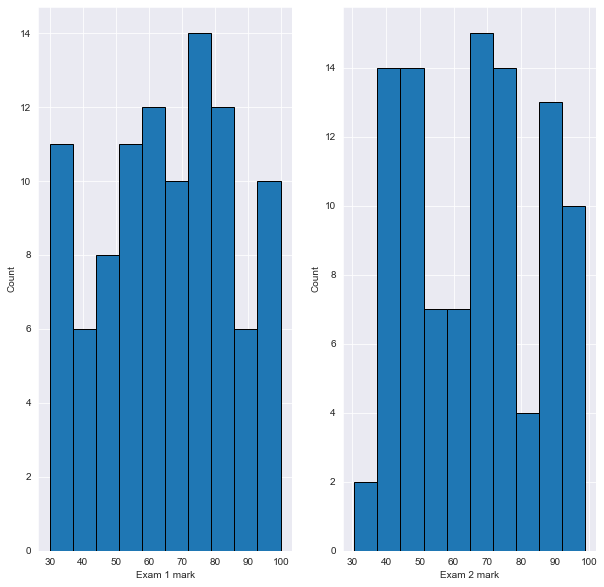

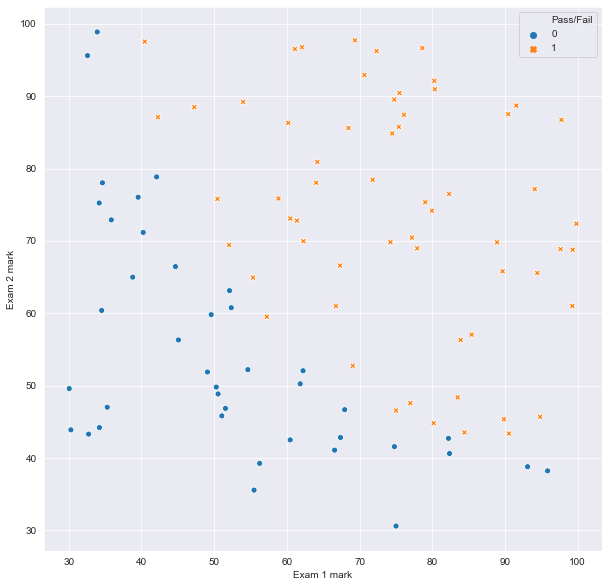

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('Exam_marks.csv', header = None)
columns = ['Exam 1 mark', 'Exam 2 mark', 'Pass/Fail']
df.columns = columns
print(df.describe())

# generate histograms
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(121)
ax.set_xlabel('Exam 1 mark')
ax.set_ylabel('Count')
ax.hist(df['Exam 1 mark'], ec = 'k')
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Exam 2 mark')
ax2.set_ylabel('Count')
ax2.hist(df['Exam 2 mark'], ec = 'k')

# plot data
fig2 = plt.figure(figsize = (10, 10))
ax3 = sns.scatterplot(data = df, x = 'Exam 1 mark', y = 'Exam 2 mark',
                      hue = 'Pass/Fail', style = 'Pass/Fail')
plt.show()

We assign the X and y variables and split the data into training and testing sets. Then we compute the correlation matrix.

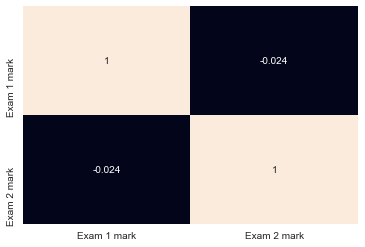

In [5]:
# compute and calculate the correlation matrix
X = df[['Exam 1 mark', 'Exam 2 mark']]
y = df['Pass/Fail']
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
corr_matrix = X.corr()
fig = plt.figure()
sns.heatmap(corr_matrix, annot = True, cbar = False)
plt.show()

Evidently there is no relationship between student scores on exam 1 and exam 2.

Now we create a logistic regression classifier, fit to the training data and make predictions on the test data. Then we will print the confusion matrix and classification report. We will ignore regularisation and therefore set the regularisation paramter $C$ to a high value.

In [9]:
# create logistic regressor
# C is the inverse of regularisation strength so to train the model without regularisation set C to a high value
log_reg = LogisticRegression(solver = 'liblinear', C = 1e4)
# fit to training data
log_reg.fit(X_train, y_train)
# predict the labels of the test data (y_test)
y_pred = log_reg.predict(X_test)

# compute and print the confusion matrix and classification report
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification report:')
print(classification_report(y_test, y_pred))

Confusion matrix:
[[ 9  3]
 [ 1 17]]


Classification report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.85      0.94      0.89        18

    accuracy                           0.87        30
   macro avg       0.88      0.85      0.86        30
weighted avg       0.87      0.87      0.86        30



Although the sample size is very small we can have a fairly high level of confidence in the predictive ability of the classifier. 

The logistic regression hypothesis function is $$h_\theta(X)= \frac{1}{1 + e^{-\theta^TX}}$$

where $\Theta$ is the coefficient vector and $X$ is the feature vector. Predictions above $0.5$ are classed one, and predictions below $0.5$ are classed zero, meaning the decision boundary occurs at $h_\Theta(X) = 0.5$. If $h_\Theta(X) = 0.5$, then $e^{-\Theta^TX} = 1$ and we must have $\Theta^TX = 0$.

Hence, the logistic regression decision boundary is defined by $\Theta^TX = \theta_0+\theta_1x_1+\theta_2x_2... = 0$. We can retrieve the coefficients and intercept to plot the decision boundaries.

In [11]:
# retrieve coefficient and intercept data (a*x1 + b*x2 +c = 0)
a, b = log_reg.coef_[0][0], log_reg.coef_[0][1]
c = log_reg.intercept_[0]
# create x points for plot
x = np.linspace(30, 100, 100)
# define y points for plot
y_plot = -(a/b)*x - (c/b)

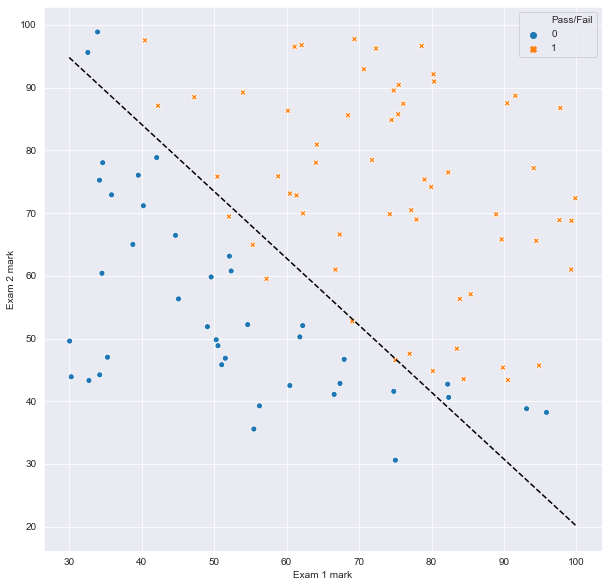

In [19]:
# plot data and decision boundary
fig = plt.figure(figsize = (10, 10))
ax4 = sns.scatterplot(data = df, x = 'Exam 1 mark', y = 'Exam 2 mark',
                      hue = 'Pass/Fail', style = 'Pass/Fail')
ax4.plot(x, y_plot, color = 'k', linestyle = 'dashed')
plt.show()

To finish we will make admission predictions for two new students from their exam results.

In [17]:
# make predictions for candidate 1 who scores 80 and 60, and 2 candidate who scores 45 and 55
new_candidates = {'Exam 1 mark': [80, 45], 'Exam 2 mark': [60, 55]}
new_df = pd.DataFrame(new_candidates)
predictions = log_reg.predict(new_df)
dict = {0: 'not admitted', 1: 'admitted'}
print('candidate 1 is predicted to be {}, candidate 2 is predicted to be {}'.format(dict[predictions[0]], dict[predictions[1]]))

candidate 1 is predicted to be admitted, candidate 2 is predicted to be not admitted
